# Proyek Analisis Data: [Bike-Sharing-dataset]
- **Nama:** [I Gusti Arya Aditya Dharma]
- **Email:** [mc179d5y0615@student.devacademy.id]
- **ID Dicoding:** [MC179D5Y0615]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan waktu perhari dan perjam selama 2 tahun ini?
- Berapa banyak penggunaan sepeda yang berasal dari kategori casual atau registered pada akhir pekan selama 2 tahun ini?
- Bagaimana tren penggunaan sepeda berdasarkan musim?


## Import Semua Packages/Library yang Digunakan

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [142]:
df_hari = pd.read_csv("day.csv")
df_hari


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [143]:
df_jam= pd.read_csv("hour.csv")
df_jam

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Terdapat 2 Dataset yaitu har(day) dan jam(hour)
- Pada file Readme terdapat 4 musim yaitu  1 = musim semi, 2 = musim panas, 3 = musim gugur, 4 = musim dingin
- Kondisi cuaca 1: Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan, 2: Kabut + Mendung, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut, 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan, 4: Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut

### Assessing Data

In [144]:
df_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [145]:
df_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [146]:
df_hari.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [147]:
df_jam.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [148]:
df_hari.duplicated().sum()

0

In [149]:
df_jam.duplicated().sum()

0

In [150]:
df_hari.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [151]:
df_jam.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat data atau nilai terduplikat pada dataset hari dan jam
- Tidak terdapat data atau nilai yang kosong pada dataset hari dan jam

### Cleaning Data

In [152]:
# Memastikan tidak terdapat nilai minus dalam kolom cnt (total pengguna)
print(df_hari[df_hari['cnt'] < 0])
print(df_jam[df_jam['cnt'] < 0])

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [153]:
df_hari.to_csv("df_hari.csv", index=False)

In [154]:
df_jam.to_csv("df_jam.csv", index=False)

**Insight:**
- Tidak terdapat data yang kosong, maka data cleaning tidak diperlukan
- Mendownload Dataset yang telah dicleaning guna memudahkan proses visualisasi data pada streamlit

## Exploratory Data Analysis (EDA)

### Explore ...

Pertanyaan Pertama: Bagaimana pola penggunaan sepeda berdasarkan waktu perhari dan perjam selama 2 tahun ini?

In [155]:
usage_per_day = df_hari.groupby(['holiday', 'weekday', 'workingday'])['cnt'].mean().reset_index()
print("Pola penggunaan sepeda berdasarkan hari dalam seminggu:")
print(usage_per_day.to_string(index=False))

Pola penggunaan sepeda berdasarkan hari dalam seminggu:
 holiday  weekday  workingday         cnt
       0        0           0 4228.828571
       0        1           1 4398.866667
       0        2           1 4544.621359
       0        3           1 4520.825243
       0        4           1 4720.343137
       0        5           1 4718.588235
       0        6           0 4550.542857
       1        1           0 3973.666667
       1        2           0 1013.000000
       1        3           0 7403.000000
       1        4           0 1960.000000
       1        5           0 3247.000000


In [156]:
usage_per_hour = df_jam.groupby('hr')['cnt'].mean().reset_index()
print("\nPola penggunaan sepeda berdasarkan jam dalam sehari:")
print(usage_per_hour.to_string(index=False))



Pola penggunaan sepeda berdasarkan jam dalam sehari:
 hr        cnt
  0  53.898072
  1  33.375691
  2  22.869930
  3  11.727403
  4   6.352941
  5  19.889819
  6  76.044138
  7 212.064649
  8 359.011004
  9 219.309491
 10 173.668501
 11 208.143054
 12 253.315934
 13 253.661180
 14 240.949246
 15 251.233196
 16 311.983562
 17 461.452055
 18 425.510989
 19 311.523352
 20 226.030220
 21 172.314560
 22 131.335165
 23  87.831044


**Insight:**
- Dalam waktu perhari pola penggunaan sepeda yang paling tinggi adalah pada holiday, hari rabu, dan bukan pada hari kerja dengan nilai rata-rata 7403
- Dalam waktu perjam pola penggunaan sepeda yang paling tinggi adalah pada pukul 17.00 dengan nilai rata-rata 461.452055

Pertanyaan Kedua: Berapa banyak penggunaan sepeda yang berasal dari kategori casual atau registered pada akhir pekan selama 2 tahun ini?

In [157]:
weekend_usage = df_hari[df_hari['weekday'].isin([0, 6])][['casual', 'registered']].sum()
print("Penggunaan sepeda berdasarkan kategori casual dan registered pada akhir pekan selama 2 tahun:")
print(weekend_usage.to_string())

Penggunaan sepeda berdasarkan kategori casual dan registered pada akhir pekan selama 2 tahun:
casual        294373
registered    627461


**Insight:**
- Dalam waktu 2 tahun selama akhir pekan penggunaan sepeda yang berasal dari kategori registered lebih tinggi dari pada kategori casual

Pertanyaan Ketiga: Bagaimana tren penggunaan sepeda berdasarkan musim?

In [158]:
season_usage = df_hari.groupby('season')[['casual', 'registered', 'cnt']].mean().reset_index()

print("Tren penggunaan sepeda berdasarkan musim:")
print(season_usage.to_string(index=False))

Tren penggunaan sepeda berdasarkan musim:
 season      casual  registered         cnt
      1  334.928177 2269.204420 2604.132597
      2 1106.097826 3886.233696 4992.331522
      3 1202.611702 4441.691489 5644.303191
      4  729.112360 3999.050562 4728.162921


**Insight:**
- Dalam waktu 2 tahun musim gugur mencatatkan penggunaan sepeda yang paling tinggi dibandingkan dengan musim lainnya

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu perhari dan perjam selama 2 tahun ini?

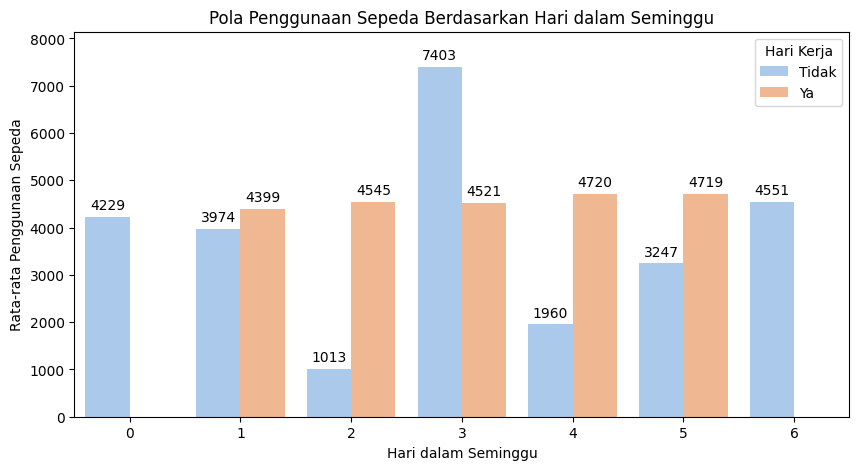

In [159]:
# hari
plt.figure(figsize=(10, 5))
bars = sns.barplot(data=usage_per_day, x='weekday', y='cnt', hue='workingday', palette='pastel')

plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Penggunaan Sepeda')
plt.title('Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Tidak', 'Ya'], title='Hari Kerja')

plt.xticks(rotation=0)
plt.ylim(0, usage_per_day['cnt'].max() * 1.1)

for bar in bars.containers:
    plt.bar_label(bar, fmt='%.0f', fontsize=10, padding=3)

plt.show()

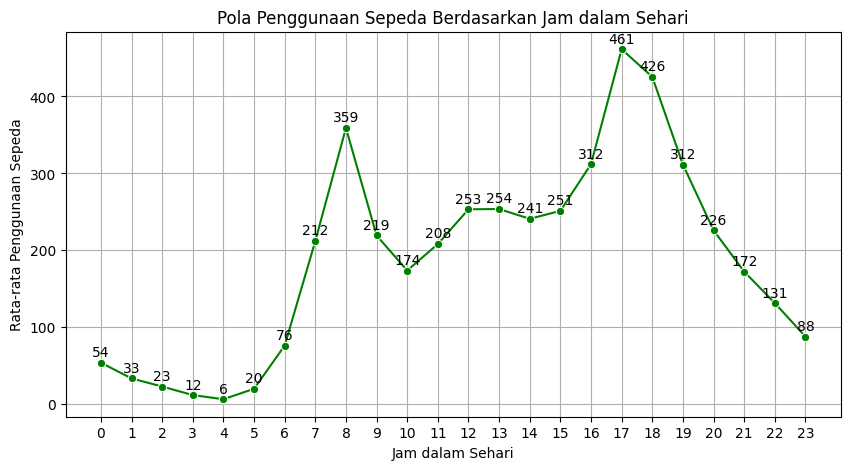

In [160]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=usage_per_hour, x='hr', y='cnt', marker='o', linestyle='-', color='green', ax=ax)
ax.set_xlabel('Jam dalam Sehari')
ax.set_ylabel('Rata-rata Penggunaan Sepeda')
ax.set_title('Pola Penggunaan Sepeda Berdasarkan Jam dalam Sehari')
ax.set_xticks(range(0, 24))
ax.grid(True)

for x, y in zip(usage_per_hour['hr'], usage_per_hour['cnt']):
    ax.text(x, y + 8, f'{y:.0f}', ha='center', fontsize=10)

plt.show()

**Insight:**
- Penggunaan sepeda tertinggi pada holiday hari rabu dengan jumlah pengguna sebesar 7403 dan yang paling rendah adalah pada holiday hari selasa dengan jumlah pengguna sebesar 1013
- Penggunaan sepeda berdasarkan jam tertinggi yaitu pada jam 17.00 dengan jumlah pengguna sebesar 461 dan terendah adalah pada jam 04.00 dengan jumlah pengguna sebesar 6

### Pertanyaan 2:  Berapa banyak penggunaan sepeda yang berasal dari kategori casual atau registered pada akhir pekan selama 2 tahun ini?

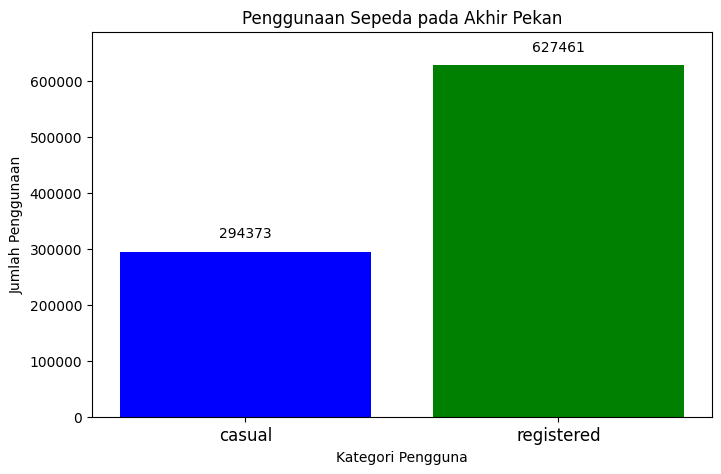

In [161]:
plt.figure(figsize=(8, 5))
bars = plt.bar(weekend_usage.index, weekend_usage.values, color=['blue', 'green'])
plt.xlabel("Kategori Pengguna")
plt.ylabel("Jumlah Penggunaan")
plt.title("Penggunaan Sepeda pada Akhir Pekan")

plt.ylim(0, weekend_usage.max() + 60000)
plt.xticks(fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20000, round(yval), ha='center', va='bottom', fontsize=10)

plt.show()


**Insight:**
- Penggunaan sepeda tertinggi pada akhir pekan yaitu pada kategori pengguna registered yaitu dengan jumlah pengguna sebesar 627461

### Pertanyaan 3: Bagaimana tren penggunaan sepeda berdasarkan musim?

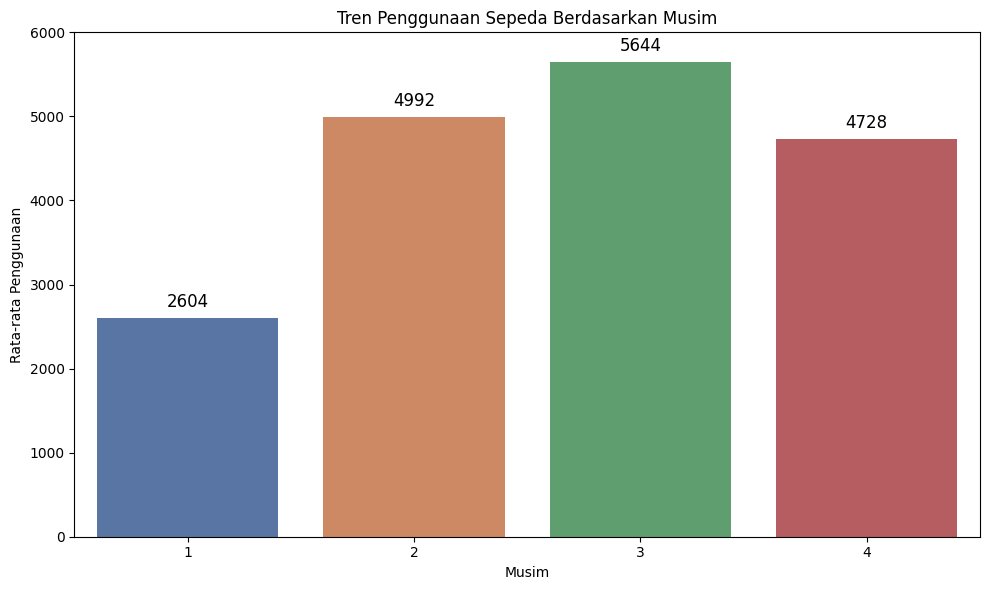

In [162]:
season_usage[['casual', 'registered', 'cnt']] = season_usage[['casual', 'registered', 'cnt']].round()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='season', y='cnt', data=season_usage, hue='season', palette='deep', legend=False)

plt.ylim(0, 6000)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Musim')
plt.ylabel('Rata-rata Penggunaan')
plt.title('Tren Penggunaan Sepeda Berdasarkan Musim')

plt.tight_layout()

plt.show()

**Insight:**
- Penggunaan sepeda tertinggi terdapat pada musim gugur yaitu dengan rata-rata 5644 dan terendah yaitu musim semi dengan rata-rata 2604

Disini saya akan menganalisis lanjutan yaitu bagaimana perbandingan penggunaan sepeda antara tahun 2011 dan 2012?

In [163]:
total_increase = usage_per_year["2012"] - usage_per_year["2011"]
increase_percent = (total_increase / usage_per_year["2011"]) * 100

print(usage_per_year.to_string(index=True))
print(f"\nPeningkatan dari 2011 ke 2012  {total_increase:,} sepeda.")
print(f"Persen {increase_percent:.2f}%")

2011    1243103
2012    2049576

Peningkatan dari 2011 ke 2012  806,473 sepeda.
Persen 64.88%


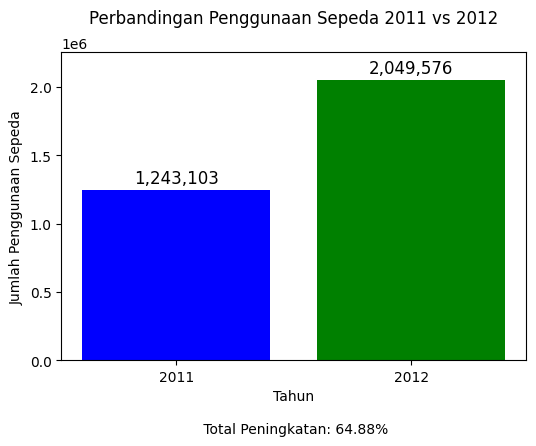

In [164]:
plt.figure(figsize=(6, 4))
plt.bar(usage_per_year.index, usage_per_year.values, color=["blue", "green"])
plt.xlabel(f"Tahun\n\n Total Peningkatan: {increase_percent:.2f}%")
plt.ylabel("Jumlah Penggunaan Sepeda")
plt.title("Perbandingan Penggunaan Sepeda 2011 vs 2012\n")
plt.ylim(0, usage_per_year.max() * 1.1)

for i, v in enumerate(usage_per_year.values):
    plt.text(i, v + 50000, f"{v:,}", ha="center", fontsize=12)

plt.show()

**Insight:**
- Total peningkatan dari 2011 ke 2012 adalah 806,473 sepeda
atau 64.88%

## Conclusion

- Conclution pertanyaan 1:
Penggunaan sepeda tertinggi terjadi pada hari libur, terutama hari Rabu, dengan rata-rata 7.403 pengguna. Sementara itu, penggunaan sepeda terendah tercatat pada hari libur Selasa dengan 1.013 pengguna. Dalam skala per jam, jam sibuk tertinggi adalah pukul 17.00 dengan rata-rata 461 pengguna, sedangkan waktu paling sepi adalah pukul 04.00 dengan hanya 6 pengguna.

- Conclution pertanyaan 2:
Selama dua tahun, pengguna kategori registered mendominasi penggunaan sepeda di akhir pekan dibandingkan dengan kategori casual. Penggunaan tertinggi terjadi pada akhir pekan dengan jumlah pengguna registered mencapai 627.461.

- Conclution pertanyaan 3:
Musim gugur menjadi musim dengan penggunaan sepeda tertinggi, dengan rata-rata 5.644 pengguna per hari, sementara musim semi memiliki penggunaan terendah dengan rata-rata 2.604 pengguna.

- Conclution analisis tambahan:
Secara keseluruhan, terdapat peningkatan signifikan dalam penggunaan sepeda dari tahun 2011 ke 2012, dengan total kenaikan sebesar 806.473 sepeda atau 64,88%. Hal ini menunjukkan tren positif dalam minat masyarakat terhadap penggunaan sepeda selama periode tersebut.